In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('movie_data.csv')


df.head(10)

,review,sentiment
0,"In 1974, the teenager Martha Moxley (Maggie Gr...",1
1,OK... so... I really like Kris Kristofferson a...,0
2,"***SPOILER*** Do not read this, if you think a...",0
3,hi for all the people who have seen this wonde...,1
4,"I recently bought the DVD, forgetting just how...",0
5,Leave it to Braik to put on a good show. Final...,1
6,Nathan Detroit (Frank Sinatra) is the manager ...,1
7,"To understand ""Crash Course"" in the right cont...",1
8,I've been impressed with Chavez's stance again...,1
9,This movie is directed by Renny Harlin the fin...,1


<AxesSubplot:>

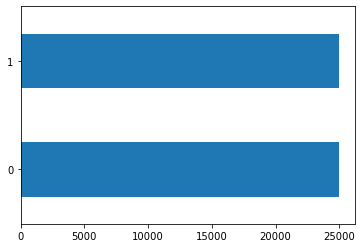

In [3]:
df.sentiment.value_counts().sort_values().plot(kind = 'barh')

In [4]:
from unidecode import unidecode
import re
from re import sub
def clean_text(text,remove_polish_letters):
    ''' Pre process and convert texts to a list of words 
    method inspired by method from eliorc github repo: https://github.com/eliorc/Medium/blob/master/MaLSTM.ipynb'''
    text = remove_polish_letters(text)
    text = str(text)
    text = text.lower()

    # Clean the text
    text = sub(r"[^A-Za-z0-9^,!?.\/'+]", " ", text)
    text = sub(r"\+", " plus ", text)
    text = sub(r",", " ", text)
    text = sub(r"\.", " ", text)
    text = sub(r"!", " ! ", text)
    text = sub(r"\?", " ? ", text)
    text = sub(r"'", " ", text)
    text = sub(r":", " : ", text)
    text = sub(r"\s{2,}", " ", text)

    #text = text.split()

    return text

df.review = df.review.apply(lambda x: clean_text(x, unidecode))

In [5]:
df.head()

,review,sentiment
0,in 1974 the teenager martha moxley maggie grac...,1
1,ok so i really like kris kristofferson and his...,0
2,spoiler do not read this if you think about w...,0
3,hi for all the people who have seen this wonde...,1
4,i recently bought the dvd forgetting just how ...,0


***SVM MODEL***

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import pickle
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report,confusion_matrix

In [13]:
tfidf = TfidfVectorizer(max_features = 5000)
X= df['review']
y = df['sentiment']

In [14]:
X = tfidf.fit_transform(X)

In [15]:
X
#<50000x5000 sparse matrix 
#5000 is maxfeatures, 50,000 is number of reviews in dataset

<50000x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 5864299 stored elements in Compressed Sparse Row format>

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2, shuffle=False)

In [17]:
clf = LinearSVC()
#Transfer Model
clf.fit(X_train, y_train)

LinearSVC()

In [19]:
y_pred =clf.predict(X_test)

In [20]:
y_pred[:10]

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0], dtype=int64)

In [21]:
y_test[:10]

40000    1
40001    0
40002    1
40003    1
40004    0
40005    0
40006    1
40007    1
40008    1
40009    1
Name: sentiment, dtype: int64

In [22]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      5013
           1       0.88      0.88      0.88      4987

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [23]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [24]:
print(confusion_matrix(y_test, y_pred, labels=[1,0]))

[[4408  579]
 [ 578 4435]]


Confusion matrix, without normalization
[[4408  579]
 [ 578 4435]]


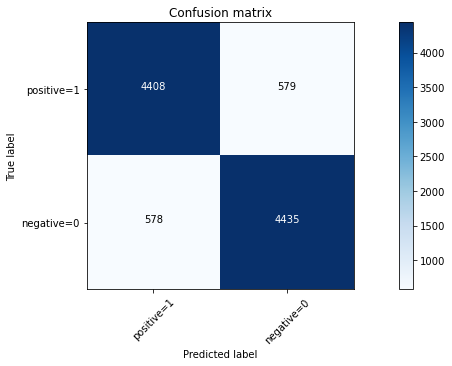

In [25]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred,labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure(figsize=(13,5))
plot_confusion_matrix(cnf_matrix, classes=['positive=1','negative=0'],normalize= False,  title='Confusion matrix')

In [26]:
Custom_comment = "This is really a bad movie, but still plot is good."
comment = clean_text(Custom_comment,unidecode)
vec = tfidf.transform([comment])
clf.predict(vec)

array([0], dtype=int64)

In [27]:
def predict_custom_comment(comment):
    
    comment = clean_text(Custom_comment,unidecode)
    vec = tfidf.transform([comment])
    #vec.shape
    return clf.predict(vec)
    

In [28]:
comment = "This is a bad movie."
predict_custom_comment(comment)

array([0], dtype=int64)

In [29]:
import pickle
pickle.dump(clf, open('model','wb'))